
Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [10]:
#env set up
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from env import host, user, password
np.random.seed(123)

def get_db_url(user,host,password,dbname):
    url = f'mysql+pymysql://{user}:{password}@{host}/dbname'
    return url 

In [ ]:
n1 = 40
mean1 = 90
sd1 = 15
n2 = 50
mean2 = 100
sd2 = 20
α=0.05

In [ ]:
office1 = stats.norm(mean1,sd1).rvs(n1)

In [ ]:
type(office1)

In [ ]:
office2 = stats.norm(mean2,sd2).rvs(n2)

In [ ]:
sns.displot(office1)

In [ ]:
sns.displot(office2)

In [ ]:
office2.var()-office1.var()

In [ ]:
t_1,p_1=stats.levene(office1,office2)
t_1,p_1

In [ ]:
t, p = stats.ttest_ind(office1, office2, equal_var = False)
t, p

In [ ]:
if p < α:
    print(f'Most likely: H_1')
else:
    print(f'Most likely: H_O')

In [ ]:
stats.ttest_ind_from_stats(mean1, sd1, n1,mean2, sd2,n2, equal_var = False)

## 2 - Load the mpg dataset and use it to answer the following questions:

In [14]:
from pydataset import data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [15]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
# Ho = there is no difference in fuel-efficiency in cars from 2008 vs 1999
# Ha = there is a difference in fuel-efficiency in cars from 2008 vs 1999
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
 11  total_mpg     234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


<AxesSubplot:>

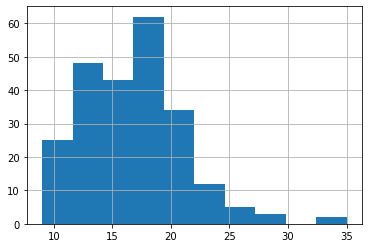

In [22]:
mpg['total_mpg'] = (mpg.cty + mpg.hwy) / 2
mpg.info()
mpg.cty.hist()


<AxesSubplot:>

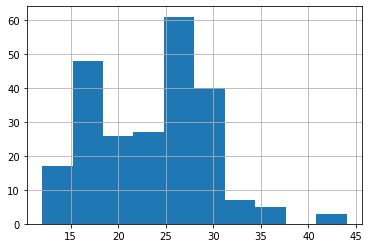

In [23]:
mpg.hwy.hist()


<AxesSubplot:>

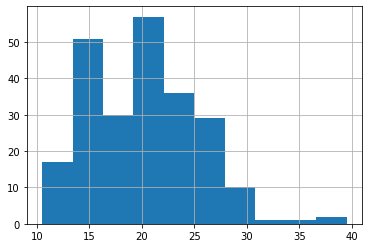

In [31]:
mpg.total_mpg.hist()

In [32]:
h2008 = mpg[mpg.year ==2008].hwy
h1999 = mpg[mpg.year ==1999].cty
c2008 = mpg[mpg.year ==2008].hwy
c1999 = mpg[mpg.year ==1999].cty
t2008 = mpg[mpg.year ==2008].total_mpg
t1999 = mpg[mpg.year ==1999].total_mpg
α=0.05

In [62]:
t, p = stats.ttest_ind(h2008, h1999, equal_var = False)
t, p 

(9.466618497423587, 5.10782454698565e-18)

In [36]:
if (p/2 < α) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [61]:
t, p = stats.ttest_ind(c2008, c1999, equal_var = True)
t, p 

(9.466618497423585, 3.4421244174046716e-18)

In [39]:
if (p/2 < α) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


In [60]:
t, p = stats.ttest_ind(t2008, t1999, equal_var = False)
t, p

(-0.21960177245940962, 0.8263750772060638)

In [43]:
if (p/2 < α) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### Are compact cars more fuel-efficient than the average car?

In [57]:
#Ho compact cars are not more fuel-efficient than average car.
#Ha - compact cars are more fuel-efficient than aveage car
mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

In [70]:
compact_t = mpg[mpg['class']=='compact'].total_mpg
compact_h = mpg[mpg['class']=='compact'].hwy
compact_c = mpg[mpg['class']=='compact'].cty

(<seaborn.axisgrid.FacetGrid at 0x13fcee070>,
 <seaborn.axisgrid.FacetGrid at 0x159e3f130>)

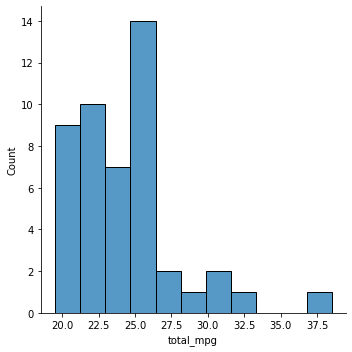

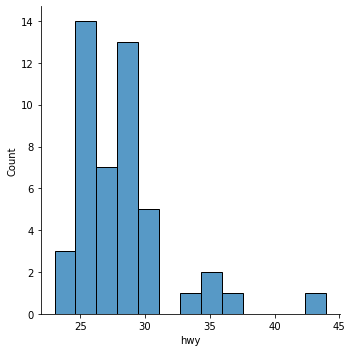

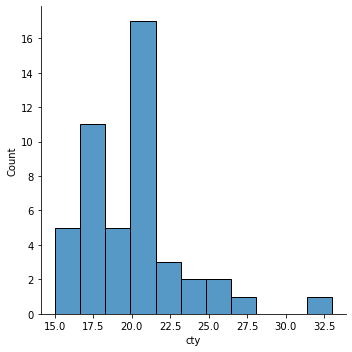

In [73]:
sns.displot(compact_t), sns.displot(compact_h), sns.displot(compact_c)

In [74]:
t,p=stats.ttest_1samp(compact_t,mpg.total_mpg.mean())
t,p

(7.896888573132535, 4.1985637943171186e-10)

In [75]:
if p/2 > α:
    print("We reject the null hypothesis")
elif t < 0 :
    print("We reject the null hypothesis for t-value")
else: 
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


In [76]:
t,p=stats.ttest_1samp(compact_h,mpg.total_mpg.mean())
t,p
if p/2 > α:
    print("We reject the null hypothesis")
elif t < 0 :
    print("We reject the null hypothesis for t-value")
else: 
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


In [77]:
t,p=stats.ttest_1samp(compact_c,mpg.total_mpg.mean())
t,p
if p/2 > α:
    print("We reject the null hypothesis")
elif t < 0 :
    print("We reject the null hypothesis for t-value")
else: 
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


### Do manual cars get better gas mileage than automatic cars?

In [82]:
# Ho - manual caras get the same milage than automatic cars
# Ha - manual cars do get better gas mileage than authomatic cars
mpg['trans'].value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [86]:
manuals = mpg[mpg['trans'].astype(str).str[0] =='m'].total_mpg
auto  = mpg[mpg['trans'].astype(str).str[0] =='a'].total_mpg
auto.count()

157

In [87]:
manuals.count()

77

(<seaborn.axisgrid.FacetGrid at 0x159fc2fa0>,
 <seaborn.axisgrid.FacetGrid at 0x158966760>)

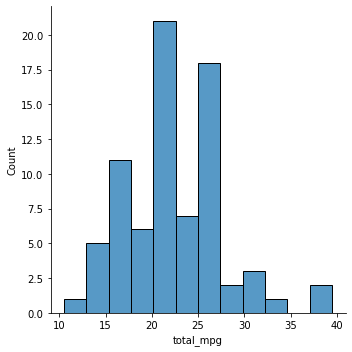

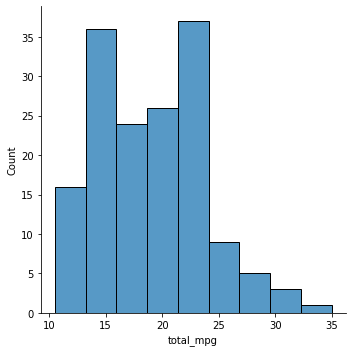

In [88]:
sns.displot(manuals), sns.displot(auto)

In [89]:
manuals.var(), auto.var()

(26.635167464114826, 21.942777233382337)

In [90]:
stats.levene(manuals, auto)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

In [91]:
stats.ttest_ind(manuals, auto)

Ttest_indResult(statistic=4.593437735750014, pvalue=7.154374401145685e-06)

In [92]:
if p/2 > α:
    print("We reject the null hypothesis")
elif t < 0 :
    print("We reject the null hypothesis for t-value")
else: 
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## Correlation Exercises

### Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [93]:
df = pd.read_csv('telco_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [94]:
from math import sqrt

from scipy import stats
from pydataset import data

In [96]:
#Look at Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [100]:
# drop missing values
df = df.dropna()

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [105]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


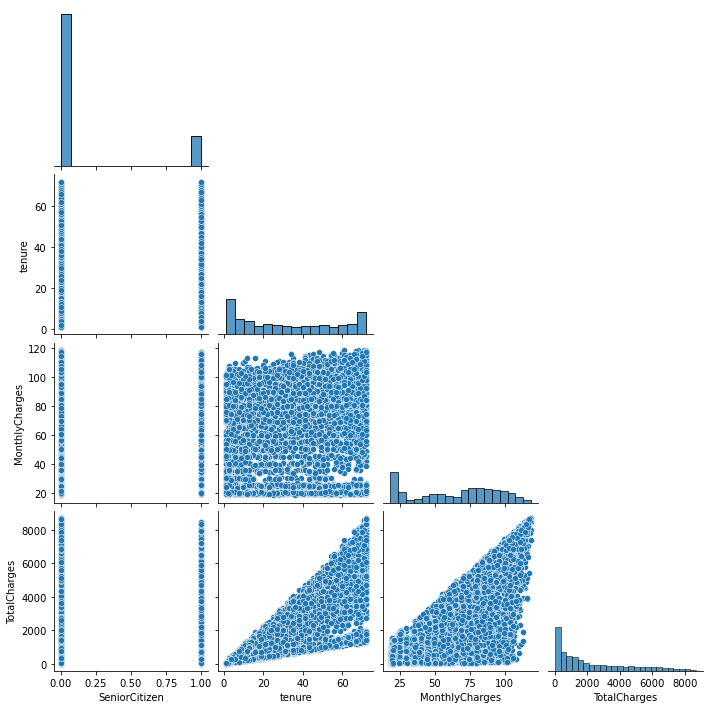

In [116]:
tenure = df.tenure
monthly_charges = df.MonthlyCharges
tcharges = df.TotalCharges

sns.pairplot(df, corner= True)

In [118]:
n = df.shape[0]
degf = n-2
α=0.05
conf_interval = 1-α

# Ho: there is no linear correlation between tenure and charges
# Ha: there is a linear correlation between tenure and charges

x = df.tenure
y = df.MonthlyCharges

def std(x):
    variance = ((x-x.mean())**2).sum()/n
    return sqrt(variance)
r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (std(x) * std(y))
r_xy

0.24686176664089346

In [119]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

21.35920054761362

In [120]:
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p

3.989821323220255e-98

In [121]:
if p < α:
    print(f'Reject Ho')
else:
    print(f'Fail to Reject Ho')

Reject Ho


In [122]:
corr, p = stats.pearsonr (x,y)
corr, p

(0.24686176664089593, 3.989821323249241e-98)

In [126]:
# Total Charges
x = df.tenure
y = tcharges
r_xy

0.8258804609332019

In [128]:
t = (r_xy * sqrt(n - 2)) / sqrt(1 - r_xy**2)
t

122.81033866910865

In [129]:
p = stats.t.sf(t, df=degf) * 2 # *2 for a two-tailed test
p

0.0

In [130]:
if p < α:
    print(f'Reject Ho')
else:
    print(f'Fail to Reject Ho')

Reject Ho


In [131]:
corr, p = stats.pearsonr (x,y)
corr, p

(0.8258804609332093, 0.0)

In [134]:
# What happens if you control for phone and internet service?
df.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [135]:
df.PhoneService.value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [140]:
#Building filters
phonesample = df[df.PhoneService == 'Yes']
nophonesample=df[df.PhoneService == 'No']
internetsample = df[df.InternetService != 'No']
nointernetsample = df[df.InternetService =='No']

In [149]:
# Reassign variables with Filters
n = phonesample.shape[0]
x = df.tenure
y = df.MonthlyCharges
r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (std(x) * std(y))
p = stats.t.sf(t, df=degf) * 2
corr, p = stats.pearsonr (x,y)
r_xy, t, p 

(0.2468617666408935, 122.81033866910865, 3.989821323249241e-98)

In [150]:
if p < α:
    print(f'Reject Ho')
else:
    print(f'Fail to Reject Ho')

Reject Ho


In [151]:
n = nophonesample.shape[0]
x = df.tenure
y = df.MonthlyCharges
r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (std(x) * std(y))
p = stats.t.sf(t, df=degf) * 2
corr, p = stats.pearsonr (x,y)
r_xy, t, p 

(0.24686176664089343, 122.81033866910865, 3.989821323249241e-98)

In [152]:
n = internetsample.shape[0]
x = df.tenure
y = df.MonthlyCharges
r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (std(x) * std(y))
p = stats.t.sf(t, df=degf) * 2
corr, p = stats.pearsonr (x,y)
r_xy, t, p 

(0.24686176664089343, 122.81033866910865, 3.989821323249241e-98)

In [153]:
n = nointernetsample.shape[0]
x = df.tenure
y = df.MonthlyCharges
r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (std(x) * std(y))
p = stats.t.sf(t, df=degf) * 2
corr, p = stats.pearsonr (x,y)
r_xy, t, p 

(0.24686176664089343, 122.81033866910865, 3.989821323249241e-98)

In [154]:
n = nophonesample.shape[0]
x = df.tenure
y = tcharges
r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (std(x) * std(y))
p = stats.t.sf(t, df=degf) * 2
corr, p = stats.pearsonr (x,y)
r_xy, t, p 

(0.825880460933202, 122.81033866910865, 0.0)

In [156]:
n = nointernetsample.shape[0]
x = df.tenure
y = tcharges
r_xy = (((x - x.mean()) * (y - y.mean())).sum() / n) / (std(x) * std(y))
p = stats.t.sf(t, df=degf) * 2
corr, p = stats.pearsonr (x,y)
r_xy, t, p 

(0.8258804609332019, 122.81033866910865, 0.0)